In [1]:
import pandas as pd
import numpy as np
import random
import scipy.stats as stats
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
x = np.linspace(-5.0, 5.0, num=10000)

mu = 0
sigma = 1

number_of_samples = 5000
samples = np.random.normal(mu, sigma, number_of_samples)
samples.sort()

In [3]:
samples

array([-3.35444386, -3.34230516, -3.314758  , ...,  3.08263864,
        3.15552492,  3.30124444])

In [4]:
sample_mean = np.mean(samples)
sample_std = np.std(samples)

In [5]:
true_distribution = stats.norm.pdf(x, mu, sigma)

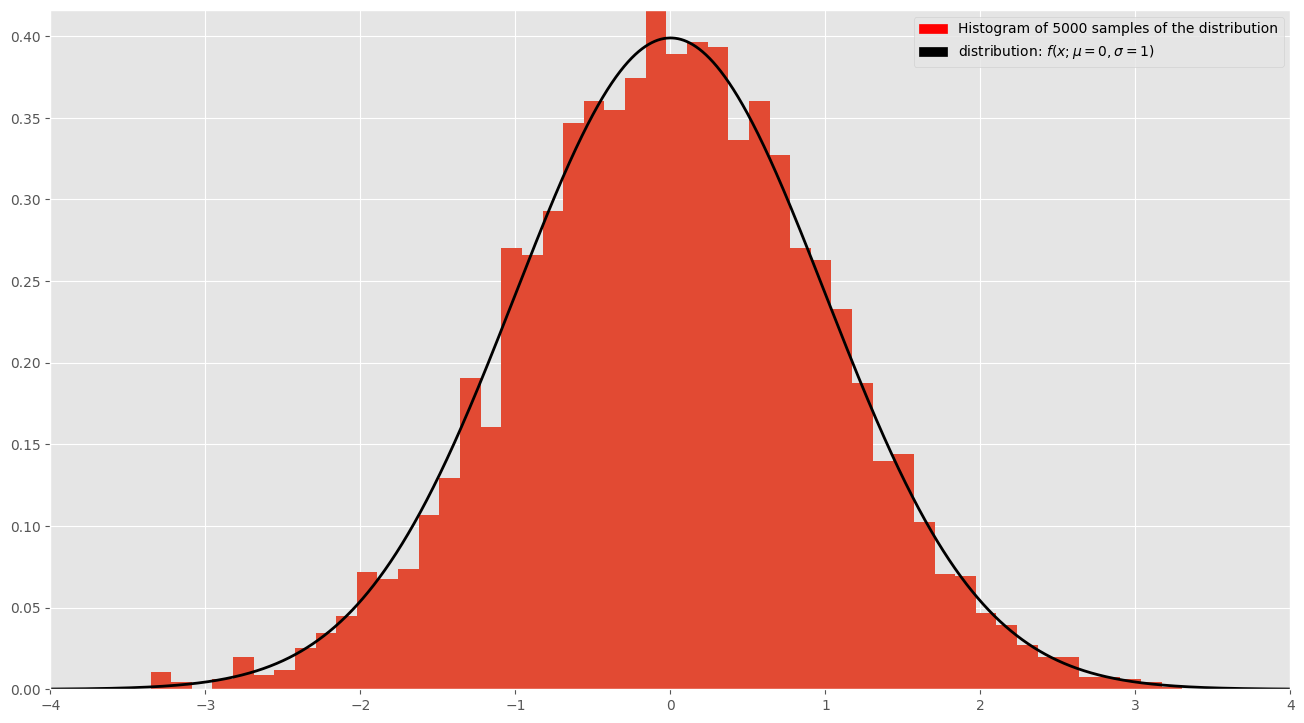

In [11]:
fig = plt.figure(figsize=(16,9), dpi=100)
plt.style.use('ggplot')
ax1 = fig.add_subplot(1, 1, 1)

n, bins, _ = ax1.hist(samples, bins=50, density=True)

ax1.plot(x, true_distribution, linewidth=2, color='black')

ax1.set_xlim(-4, 4)
ax1.set_ylim(0, n.max())

sample_patch = mpatches.Patch(
    color = 'black', 
    label=fr'distribution: $f(x; \mu={mu}, \sigma={sigma})$',
)

data_patch = mpatches.Patch(
    color='red',
    label=f'Histogram of {number_of_samples} samples of the distribution',
)

plt.legend(handles=[data_patch, sample_patch])

plt.show()

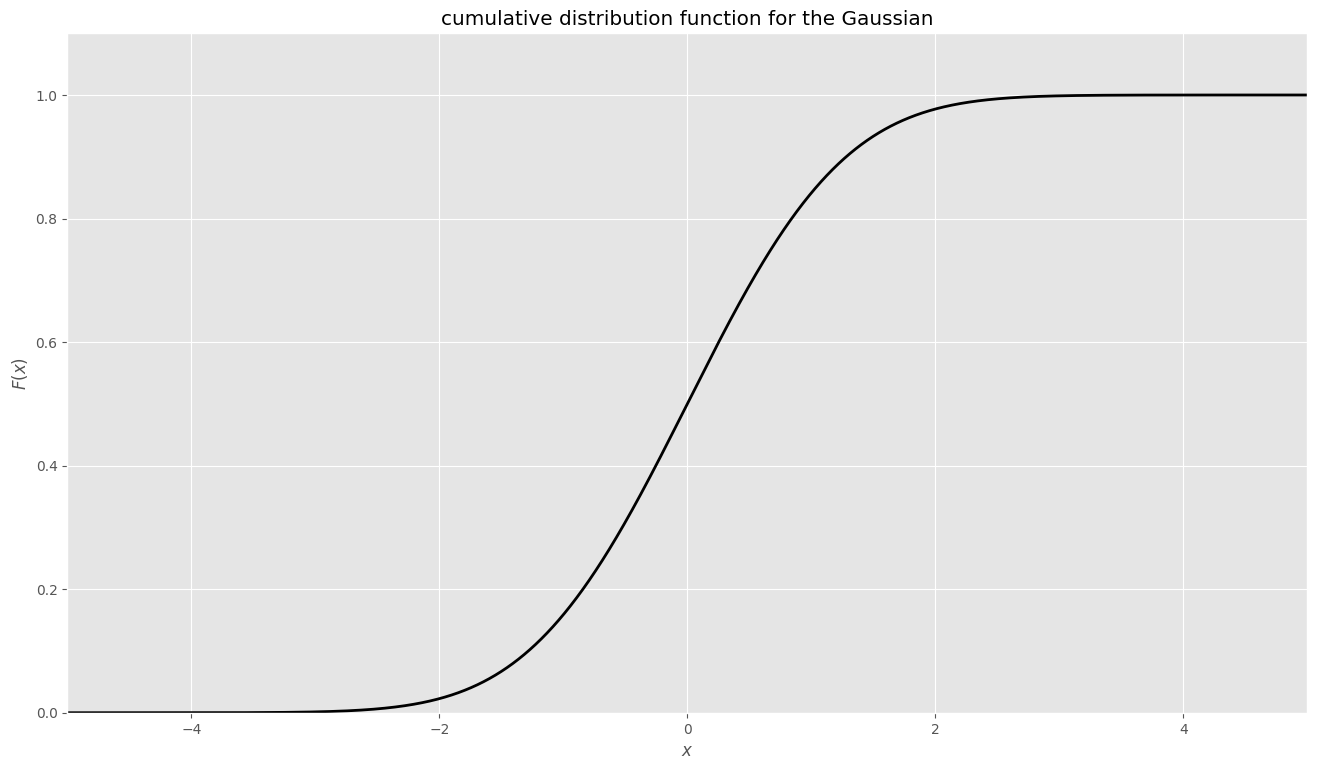

In [15]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
plt.style.use('ggplot')

ax.plot(x, stats.norm.cdf(x), linewidth=2, color='black')

ax.set_xlabel('$x$')
ax.set_ylabel('$F(x)$')

ax.set_xlim(-5, 5)
ax.set_ylim(0, 1.1)

ax.set_title('cumulative distribution function for the Gaussian')

plt.show()

In [16]:
output = stats.norm.cdf(samples)

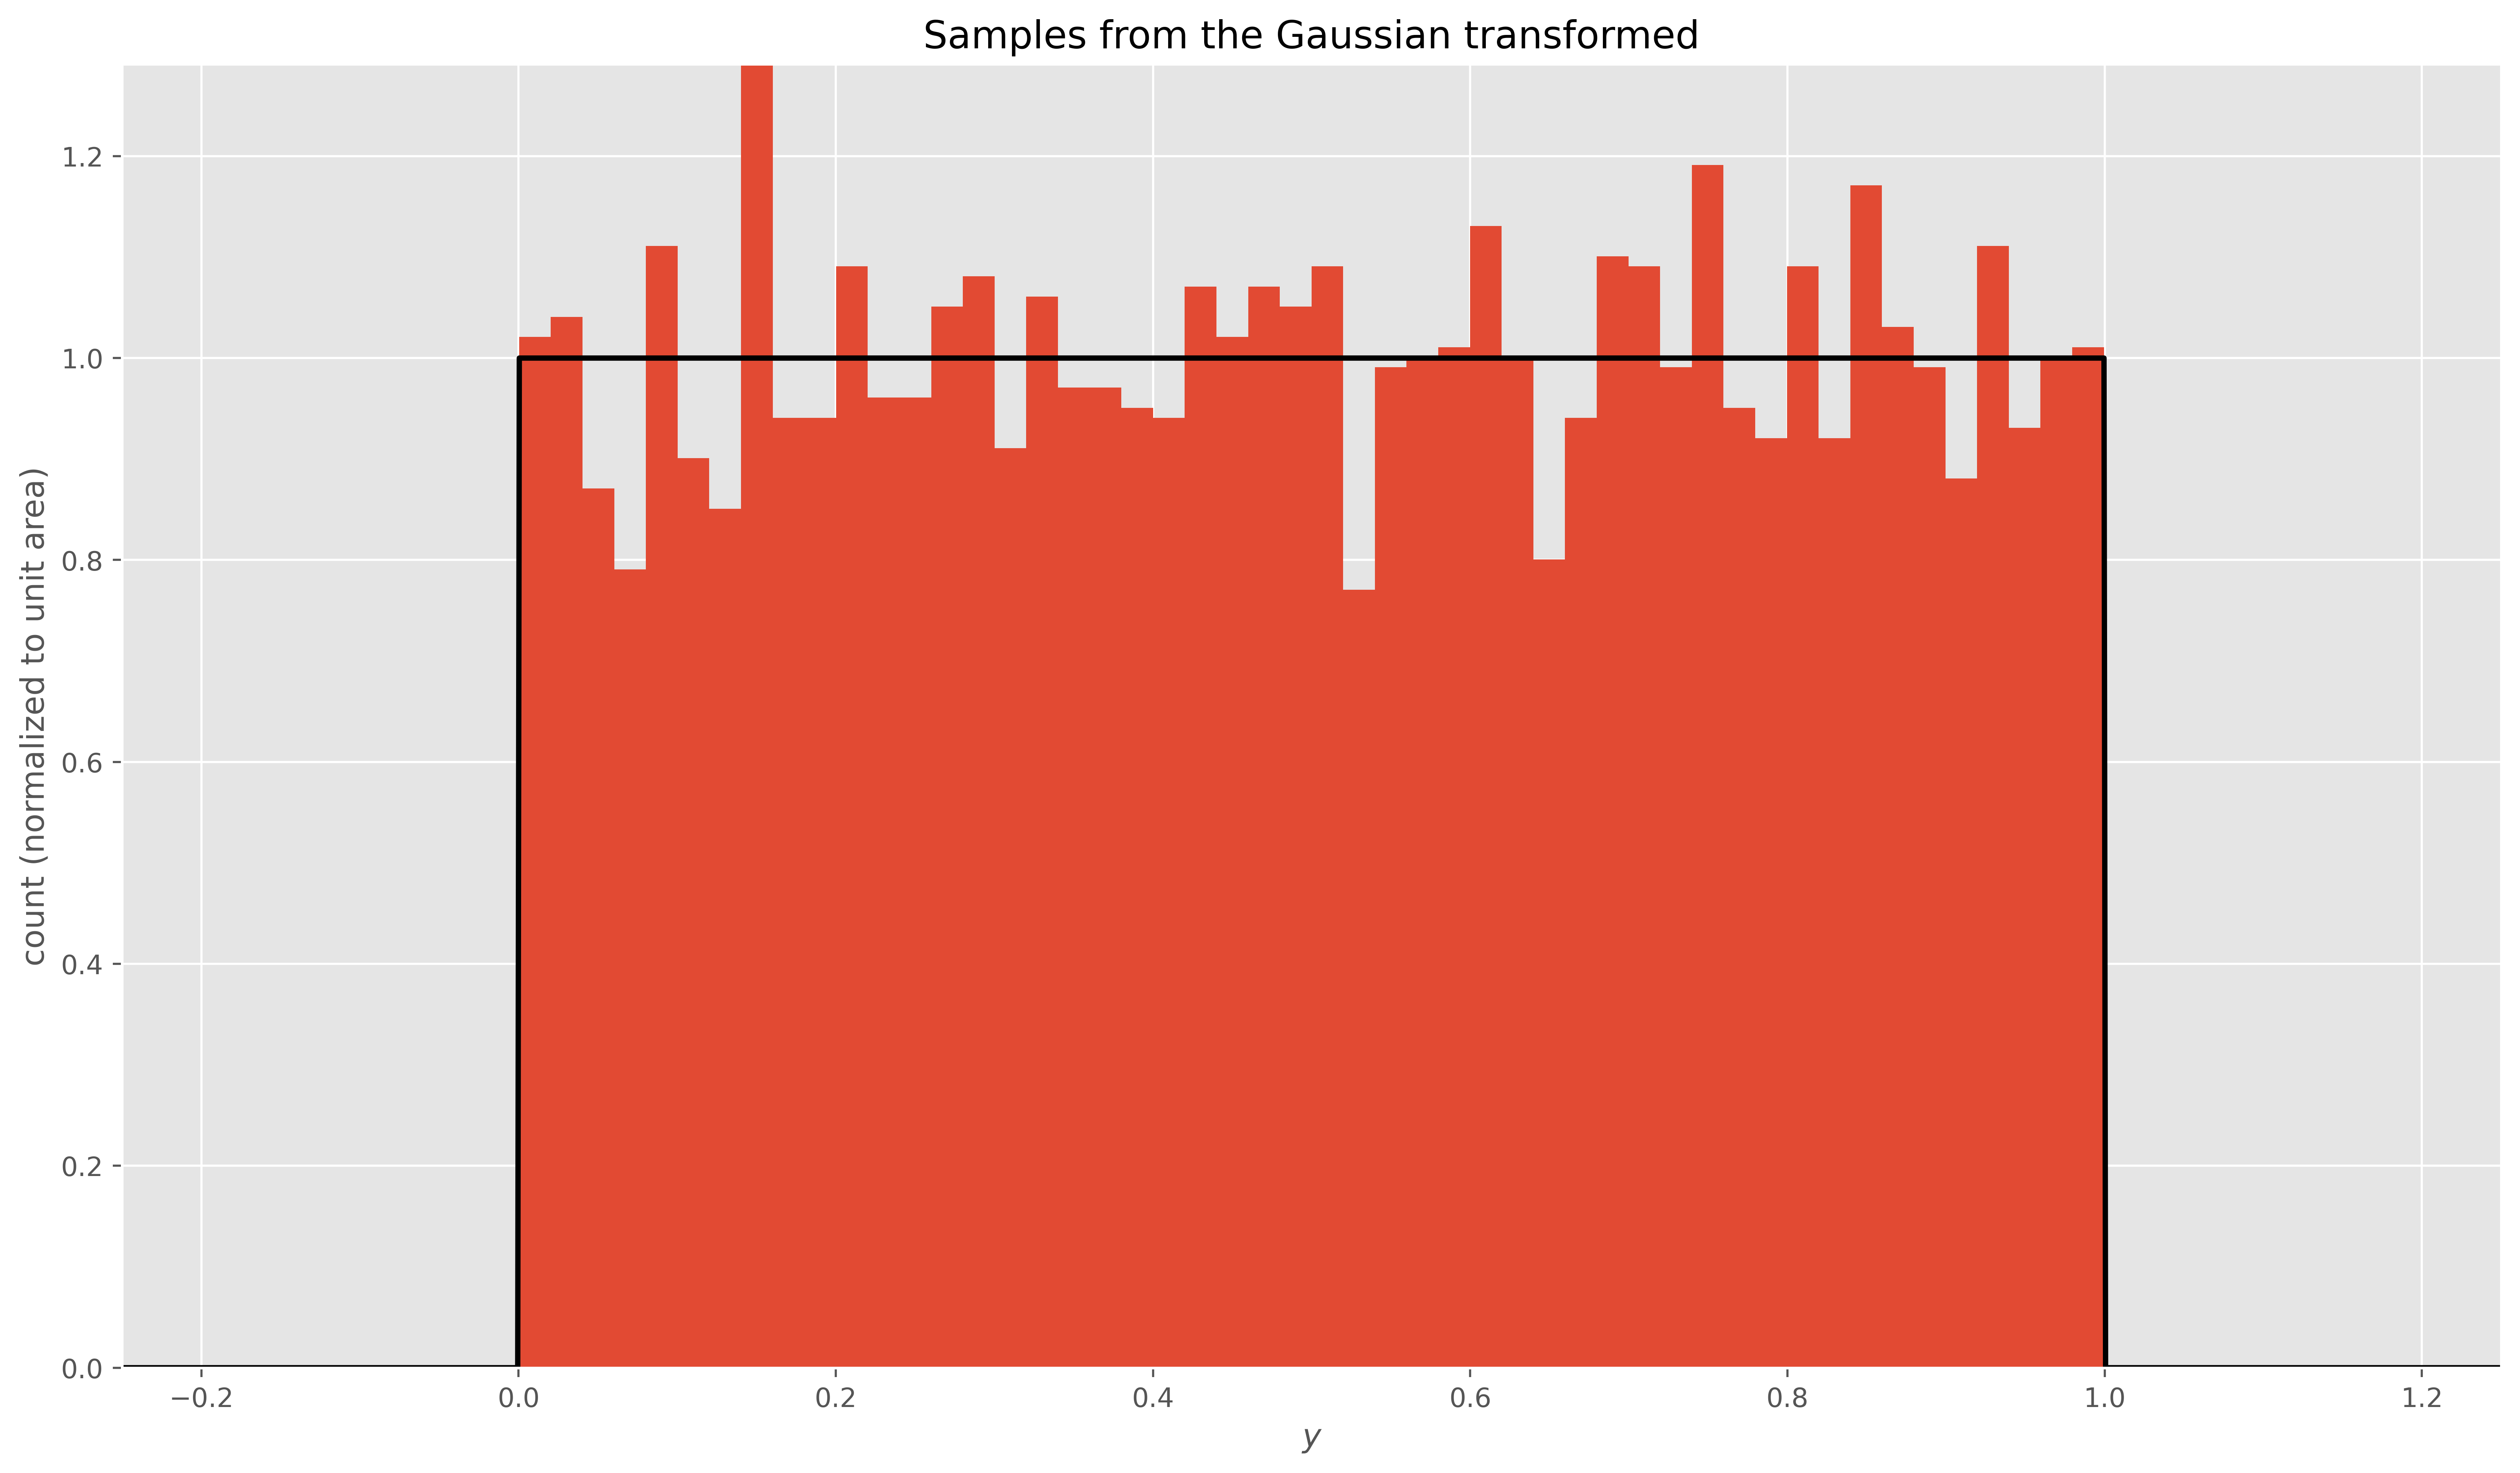

In [19]:
fig, ax = plt.subplots(figsize=(16,9), dpi=500)
n, bins, _ = ax.hist(
    output, bins=50, density=True,
)

ax.plot(x, stats.uniform.pdf(x), linewidth=2, color='black')

ax.set_title('Samples from the Gaussian transformed')
ax.set_xlabel('$y$')
ax.set_ylabel('count (normalized to unit area)')

ax.set_xlim(-0.25, 1.25)
ax.set_ylim(0, n.max())

plt.show()

In [20]:
recovered = stats.norm.ppf(output)

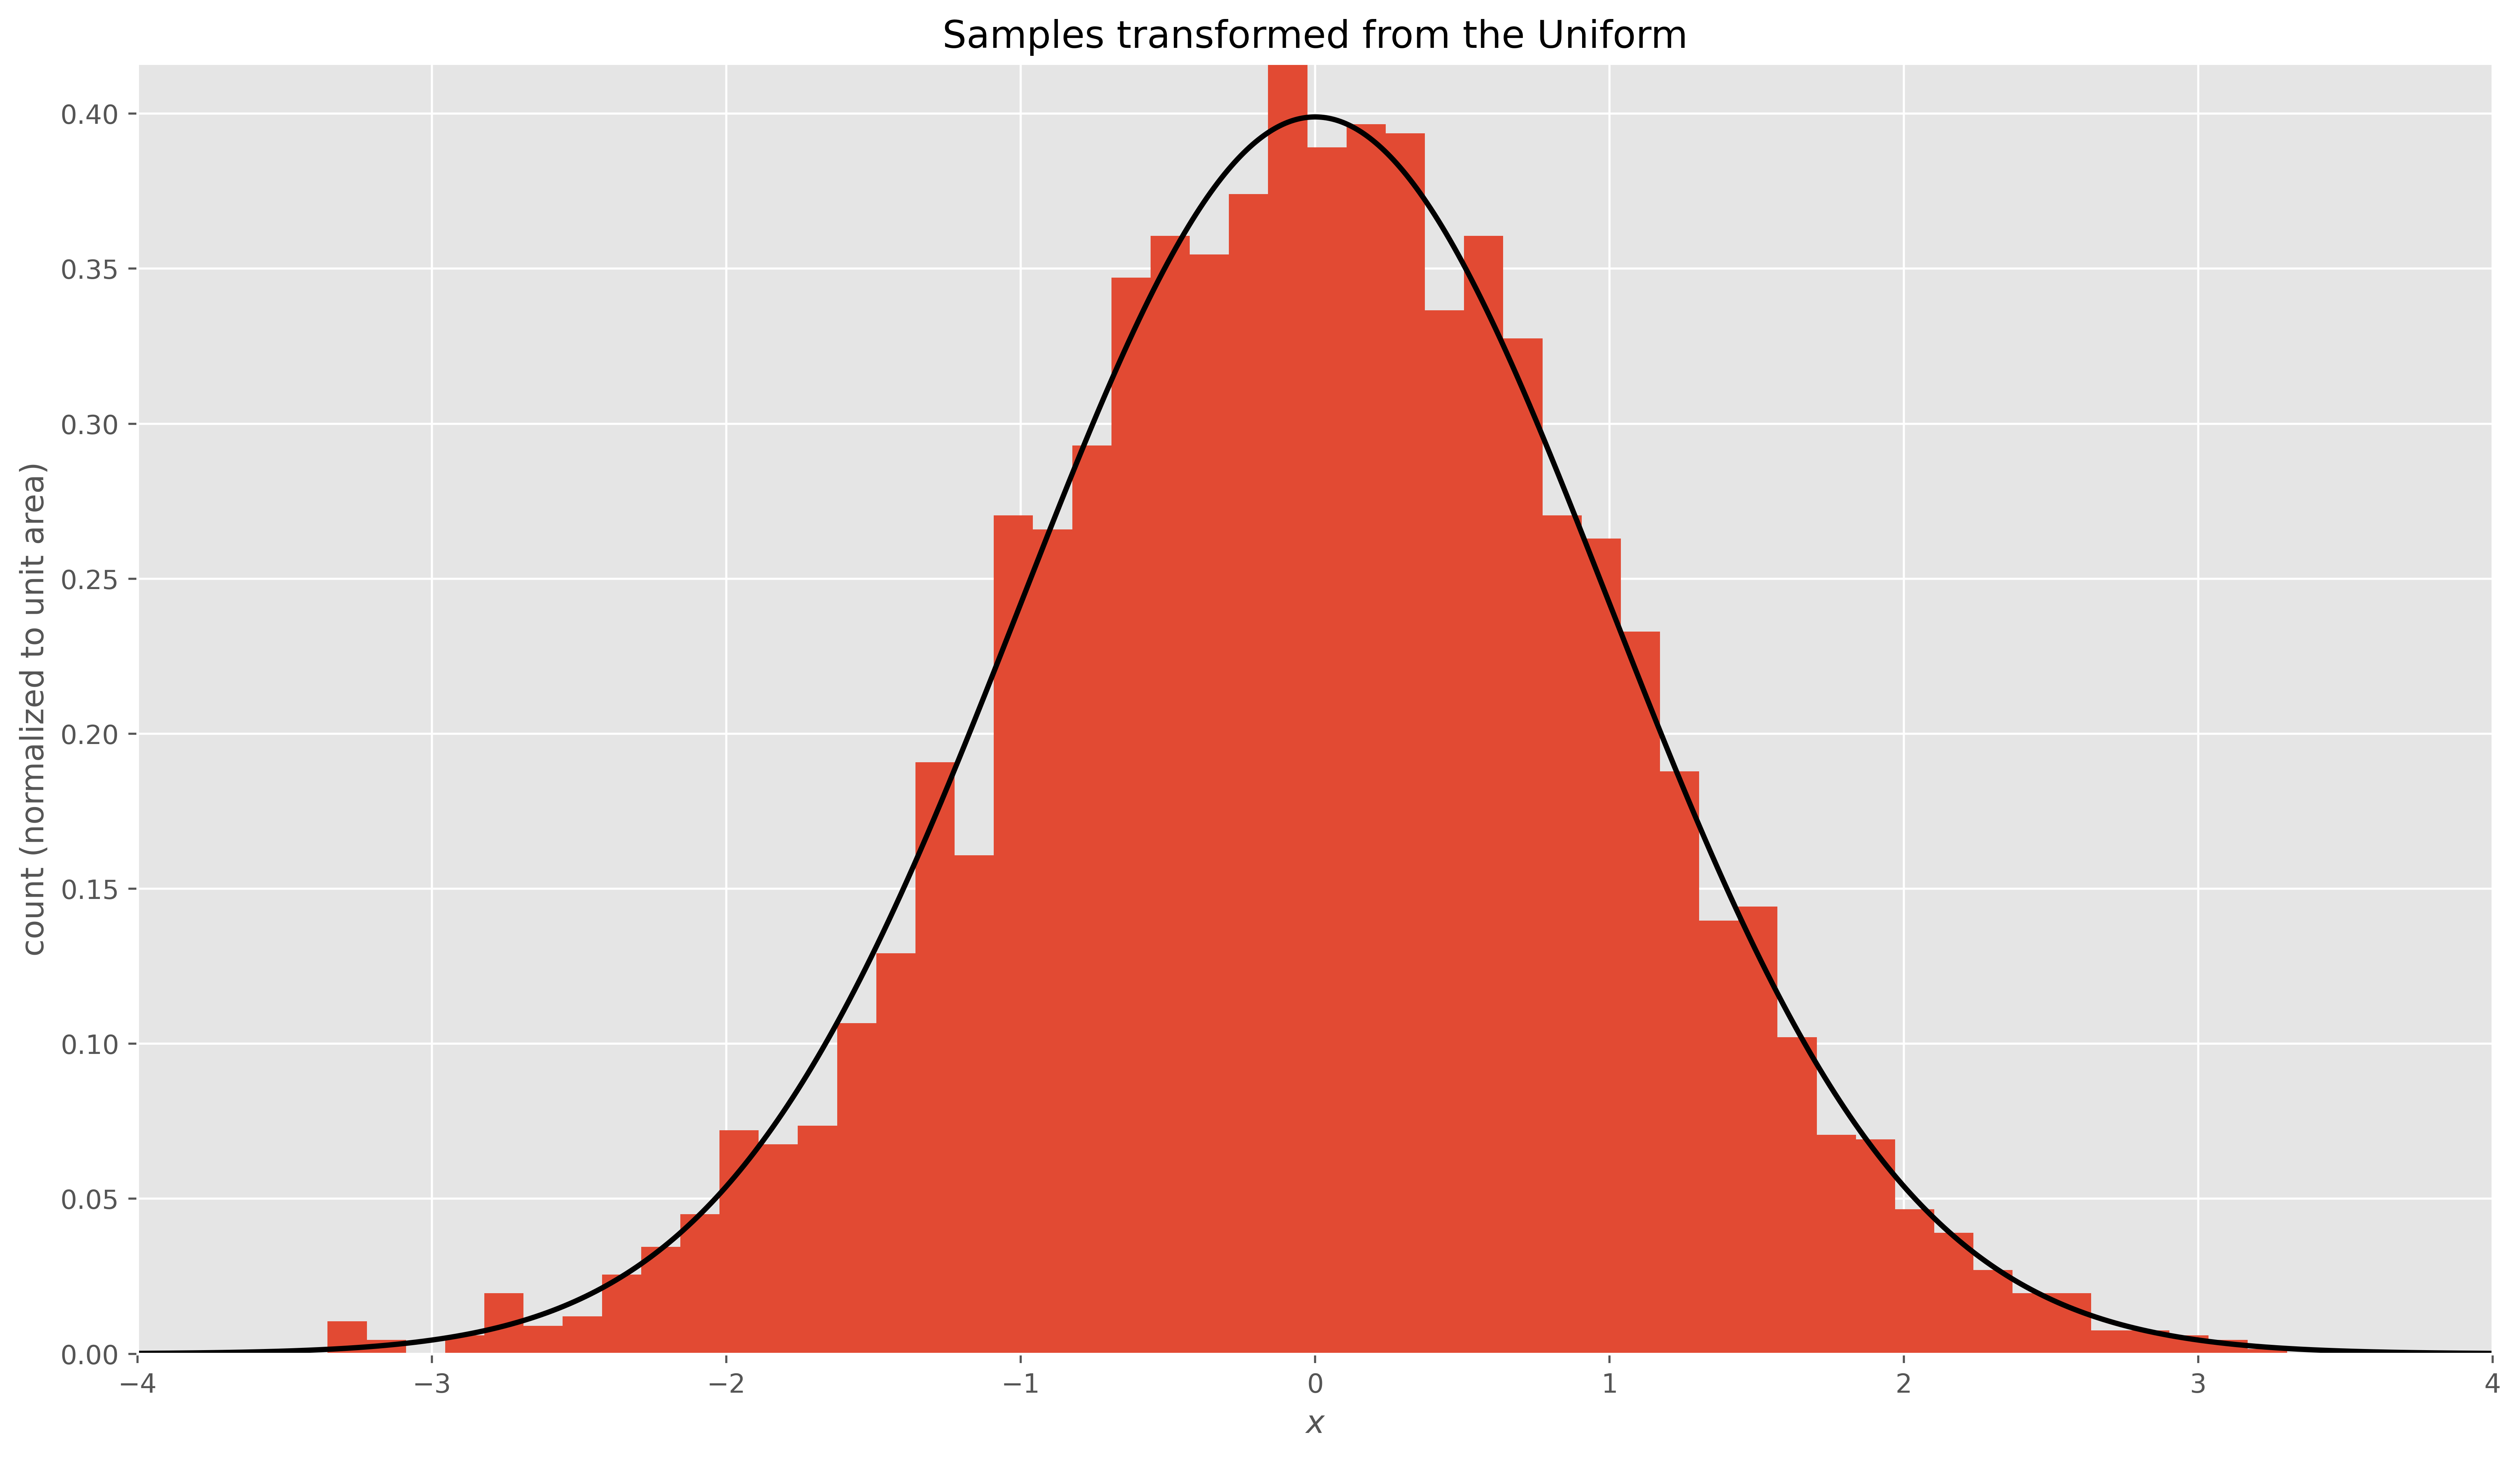

In [22]:
fig, ax = plt.subplots(figsize=(16,9), dpi=500)

n, bins, _ = ax.hist(
    recovered, bins=50, density=True
)

ax.plot(x, true_distribution, linewidth=2, color='black')

ax.set_title('Samples transformed from the Uniform')
ax.set_xlabel('$x$')
ax.set_ylabel('count (normalized to unit area)')

ax.set_xlim(-4, 4)
ax.set_ylim(0, n.max())

plt.show()